<b>Full paper is on Authorea</b>

In [21]:
from __future__  import print_function, division

import os
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as scipy
import io
import urllib2 as urllib
import numpy as np

%matplotlib inline

<b>General concept to test: </b>
<br>Younger people are more likely to ride Citi Bikes late at night

<b>Null hypothesis:</b><br>
The proportion of riders 35+ to total riders for trips starting at midnight-5 am is higher or equal
to the proportion of riders 35+ to total riders for trips starting at 5 am - midnight

<b>H0:<b>
$\frac{old riders {\mathrm{night}}}{all riders {\mathrm{night}}} >= \frac{old riders{\mathrm{day}}}{all riders{\mathrm{day}}}$

<br>Ha:
$\frac{old riders{\mathrm{night}}}{all riders{\mathrm{night}}} < \frac{old riders{\mathrm{day}}}{all riders{\mathrm{day}}}$

<br>
Alpha: 5% <br>
Confidence level: 95%

In [22]:
# Import July 2017 data
r = urllib.urlopen('https://s3.amazonaws.com/tripdata/201707-citibike-tripdata.csv.zip')
df = pd.read_csv(io.BytesIO(r.read()), compression='zip')

In [23]:
# Clean and add fields to dataframe
df['date'] = pd.to_datetime(df['starttime'])
df['age'] = 2017 - df['birth year']
df['hour'] = df['date'].dt.hour

In [24]:
# Present sample of data frame
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,age,hour
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1,2017-07-01 00:00:00,31.0,0
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1,2017-07-01 00:00:03,36.0,0
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2,2017-07-01 00:00:08,33.0,0
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1,2017-07-01 00:00:11,32.0,0
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2,2017-07-01 00:00:15,35.0,0


In [25]:
# Reduce df (simpler method than dropping long list of columns)
df = df[['hour', 'age']]

In [26]:
# Clean up and create flag/dummy fields for binary data
df['age_group'] = df['age'] >= 35
age_dict = {True: '35+', False: '<35'}
df['age_group'] = df['age_group'].map(age_dict)

df['time'] = df['hour'] < 5
time_dict = {True: 'Late Night', False: 'Daytime'}
df['time'] = df['time'].map(time_dict)

In [27]:
# Present sample of redacted dataframe
df.head()

,hour,age,age_group,time
0,0,31.0,<35,Late Night
1,0,36.0,35+,Late Night
2,0,33.0,<35,Late Night
3,0,32.0,<35,Late Night
4,0,35.0,35+,Late Night


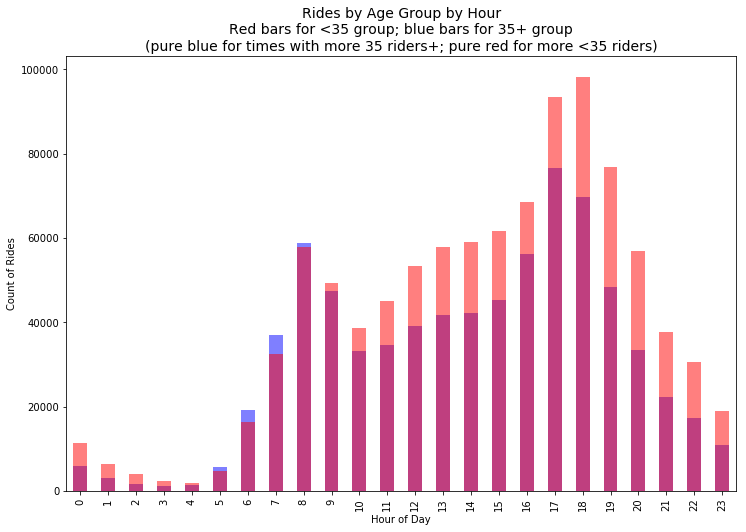

In [28]:
# Plot distribution of age groups by hour
fig = plt.figure(figsize=(12,8))

df2 = df[df['age_group'] == "35+"]
df2.groupby('hour').size().plot(kind='bar', color='blue', alpha=0.5)

df1 = df[df['age_group'] == "<35"]
df1.groupby('hour').size().plot(kind='bar', color='red', alpha=0.5, label='nine')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Rides')
plt.title('Rides by Age Group by Hour\n' +
          'Red bars for <35 group; blue bars for 35+ group\n' + 
          '(pure blue for times with more 35 riders+; pure red for more <35 riders)', fontsize = 14)

<b>Figure 1: </b> Young vs. old riders by time of day. Young riders are represented in red; old riders are represented in blue.

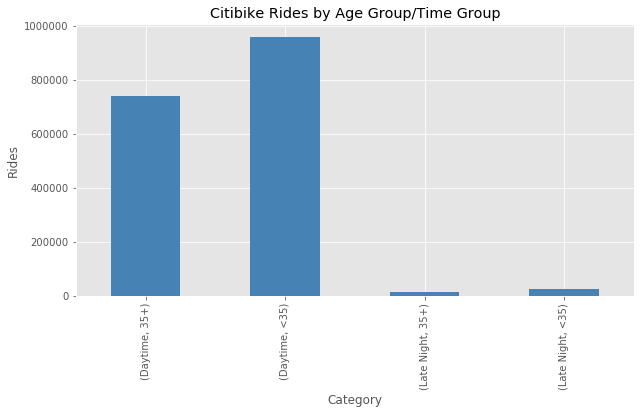

In [18]:
# Simple plot of group sizes
fig = plt.figure(figsize=(10,5))
plt.style.use('ggplot')
df.groupby(['time', 'age_group']).size().plot(kind='bar', color = 'Steelblue')
plt.xlabel('Category')
plt.ylabel('Rides')
plt.title('Citibike Rides by Age Group/Time Group')

<b>Figure 2:</b> Histogram of rides for July 2017 by category of age and time of day.

In [29]:
df[['age_group','time']].groupby(['age_group','time']).size()

age_group  time      
35+        Daytime       739363
           Late Night     13184
<35        Daytime       957269
           Late Night     25783
dtype: int64

In [42]:
len(df['time'])

1735599

In [38]:
df[['time']].groupby(['time']).size()

time
Daytime       1696632
Late Night      38967
dtype: int64

In [39]:
daytime_rides = df[['time']].groupby(['time']).size()[0]
nighttime_rides = df[['time']].groupby(['time']).size()[1]

|Rider Group |     35+ Rider   | Under-35 Rider    |                   
|----------------------------|----------------|------------------|---------------------------|
| Daytime (5 am - midnight)                | $0.4357*1696632$    | $0.5643*1696632$      | 1696632                       |
    | Nighttime (midnight - 5 am)             | $0.3383*38967$   | $0.6617*38967$      | 38967|
|                            |                |                  |                           |
| total                      |  752405       |  983194        |1735599        |

In [15]:
def evalChisq(values):
    values = np.array(values)
    E = np.empty_like(values)
    for j in range(len(values[0])):
        for i in range(2):
            
            E[i][j] = ((values[i,:].sum() * values[:,j].sum()) / 
                        (values).sum())
    return ((values - E)**2 / E).sum()

In [44]:
test_proportions = [[0.4357 * 1696632, 0.5643 * 1696632],[0.3383 * 38967, 0.6617 * 38967]]

In [55]:
chisq_test = evalChisq(test_proportions)
DOF = len(test_proportions) - 1
print ('chi sq statistics for my test: '+
       'chisq = {:.3f}, DOF = {:d}'.format(chisq_test, DOF))

chi sq statistics for my test: chisq = 1471.503, DOF = 1


In [56]:
chimin_alpha5pc = 3.84
print ("The Null hypothesis that 35+ riders are a greater proportion of total riders at night")
if chisq_test > chimin_alpha5pc :
    print ("can be rejected at alpha = 0.05")
else: 
    print ("cannot be rejected (p<0.05)")
print ("with a chi square statistics of %.2f"%chisq_test)
    

The Null hypothesis that 35+ riders are a greater proportion of total riders at night
can be rejected at alpha = 0.05
with a chi square statistics of 1471.50


<b>Test with February 2016 data</b>

In [45]:
r2 = urllib.urlopen('https://s3.amazonaws.com/tripdata/201602-citibike-tripdata.zip')
df2 = pd.read_csv(io.BytesIO(r2.read()), compression='zip')

In [37]:
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,461,2/1/2016 00:00:08,2/1/2016 00:07:49,480,W 53 St & 10 Ave,40.766697,-73.990617,524,W 43 St & 6 Ave,40.755273,-73.983169,23292,Subscriber,1966.0,1
1,297,2/1/2016 00:00:56,2/1/2016 00:05:53,463,9 Ave & W 16 St,40.742065,-74.004432,380,W 4 St & 7 Ave S,40.734011,-74.002939,15329,Subscriber,1977.0,1
2,280,2/1/2016 00:01:00,2/1/2016 00:05:40,3134,3 Ave & E 62 St,40.763126,-73.965269,3141,1 Ave & E 68 St,40.765005,-73.958185,22927,Subscriber,1987.0,1
3,662,2/1/2016 00:01:00,2/1/2016 00:12:02,537,Lexington Ave & E 24 St,40.740259,-73.984092,428,E 3 St & 1 Ave,40.724677,-73.987834,20903,Subscriber,1983.0,2
4,355,2/1/2016 00:01:41,2/1/2016 00:07:36,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,521,8 Ave & W 31 St,40.750967,-73.994442,23228,Subscriber,1978.0,1


In [46]:
# Clean and add fields to dataframe
df2['date'] = pd.to_datetime(df2['starttime']) # SLOW

In [47]:
df2['age'] = 2017 - df2['birth year']
df2['hour'] = df2['date'].dt.hour
df2 = df2[['hour', 'age']]

In [48]:
# Clean up and create flag/dummy fields for binary data
df2['age_group'] = df2['age'] >= 35
age_dict = {True: '35+', False: '<35'}
df2['age_group'] = df2['age_group'].map(age_dict)

df2['time'] = df2['hour'] < 5
time_dict = {True: 'Late Night', False: 'Daytime'}
df2['time'] = df2['time'].map(time_dict)

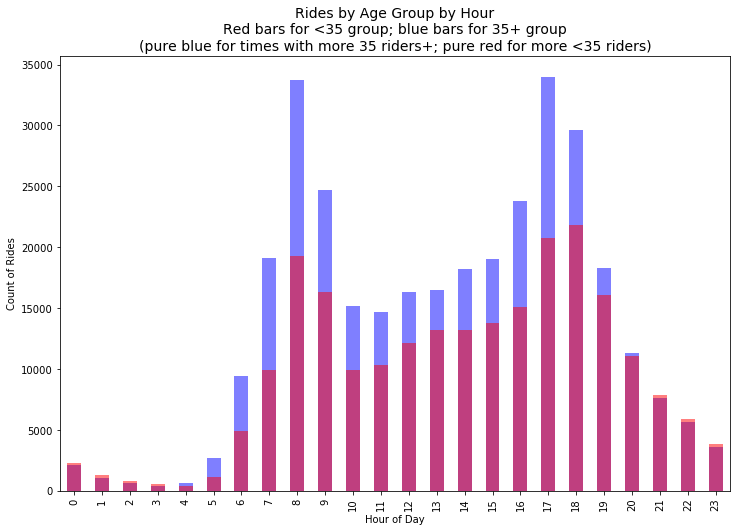

In [49]:
# Plot distribution of age groups by hour
fig = plt.figure(figsize=(12,8))

df3 = df2[df2['age_group'] == "35+"]
df3.groupby('hour').size().plot(kind='bar', color='blue', alpha=0.5)

df4 = df2[df2['age_group'] == "<35"]
df4.groupby('hour').size().plot(kind='bar', color='red', alpha=0.5, label='nine')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Rides')
plt.title('Rides by Age Group by Hour\n' +
          'Red bars for <35 group; blue bars for 35+ group\n' + 
          '(pure blue for times with more 35 riders+; pure red for more <35 riders)', fontsize = 14)

<b>Figure 3</b>: Same histogram as earlier, but for February 2016, with more pronounced differences. Older riders dominate throughout most of the day, though their edge decreases sharply around 8 P.M. Younger riders outnumber older riders from 9 P.M. - 4 A.M..

In [14]:
df2[['age_group','time']].groupby(['age_group','time']).size()

age_group  time      
35+        Daytime       323596
           Late Night      4950
<35        Daytime       226927
           Late Night      5401
dtype: int64

In [17]:
len(df2['time'])

560874

In [19]:
test_proportions2 = [[0.5878 * 550523, 0.4122 * 550523],[0.4782 * 10351, 0.5218 * 10351]]
chisq_test2 = evalChisq(test_proportions2)
DOF2 = len(test_proportions2) - 1
print ('chi sq statistics for my test: '+
       'chisq = {:.3f}, DOF = {:d}'.format(chisq_test2, DOF2))

chi sq statistics for my test: chisq = 502.976, DOF = 1


In [20]:
chimin_alpha5pc = 3.84
print ("The Null hypothesis that 35+ riders are a greater proportion of total riders at night")
if chisq_test2 > chimin_alpha5pc :
    print ("can be rejected at alpha = 0.05")
else: 
    print ("cannot be rejected (p<0.05)")
print ("with a chi square statistics of %.2f"%chisq_test2)
    

The Null hypothesis that 35+ riders are a greater proportion of total riders at night
can be rejected at alpha = 0.05
with a chi square statistics of 502.98
